Juan Fernando Salgado Lozano

c.c 1006461909

1.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize

In [82]:
Nic = 100
x0s = np.random.uniform(-10,10,Nic)
v0s = np.random.uniform(-16,16,Nic)
tmax = 14

def F(W,t):
    x,v= W
    m = 0.2 # kg
    b = 0.4 # fricción vidrio-vidrio
    k = 1 # N/m
    a = -(b/m)*v-(k/m)*x
    l = [v,a]
    return l

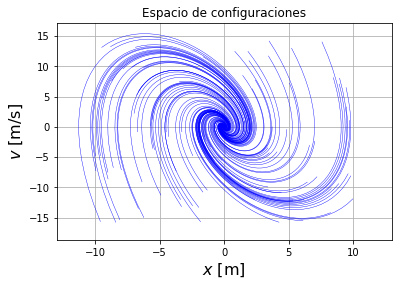

In [83]:
for x0, v0 in zip(x0s, v0s):
    t=np.linspace(0,tmax,400)
    y0=[x0,v0]
    y=integrate.odeint(F,y0,t)
    x=y[:,0]
    v=y[:,1]
    plt.plot(x,v,lw = 0.4, color = "blue")    

plt.title( "Espacio de configuraciones" )
plt.xlabel( "$x$ [m]", fontsize = 16 )
plt.ylabel( "$v$ [m/s]", fontsize = 16 )
plt.xlim( (x0s.min()-3,x0s.max()+3) )
plt.ylim( (v0s.min()-3, v0s.max()+3) )
plt.grid()

2. 

a)

In [84]:
import requests, json
import pandas as pd

response = requests.get("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json")
rawjson = response.json()
df = pd.DataFrame(rawjson)
df

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


In [85]:
import matplotlib.pyplot as plt

X = df.t
Y = df.iloc[:, 1]

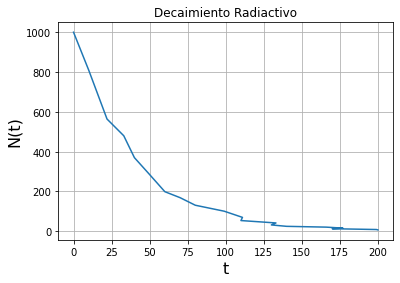

In [86]:
plt.plot(X,Y)
plt.title('Decaimiento Radiactivo')
plt.xlabel('t', fontsize = 16)
plt.ylabel('N(t)', fontsize = 16)
plt.grid()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


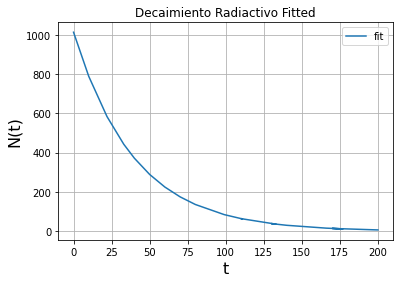

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt


def func(t, N0, b):
     return N0 * np.exp(-b * t)

optimizedParameters, pcov = opt.curve_fit(func, X, Y)

# Optimized parameters to plot the fit
plt.plot(X, func(X, *optimizedParameters), label="fit")

plt.title('Decaimiento Radiactivo Fitted')
plt.xlabel('t', fontsize = 16)
plt.ylabel('N(t)', fontsize = 16)
plt.grid()
plt.legend()
plt.show()

In [88]:
func(X, *optimizedParameters)

0     1012.950125
1      788.299971
2      583.466128
3      442.822258
4      371.536817
5      289.138087
6      225.013592
7      175.110505
8      136.274830
9       84.627634
10      62.637777
11      64.228236
12      36.079784
13      38.898503
14      30.271667
15      15.772673
16      11.970688
17      14.267461
18       6.895197
19       6.724454
Name: t, dtype: float64

In [89]:
#T = (t2-t1)*ln(2)/ln(n1)-ln(n2) ecuación de T despejada
T = ((40-0)*np.log(2))/(np.log(1012.95)-np.log(371.53)) #tomamos por ejemplo los índices 0 y 4
print('Vida media: ',T,'años')

Vida media:  27.643164221672237 años


In [90]:
t = np.log(2)/func(X, *optimizedParameters) #Error
t

0     0.000684
1     0.000879
2     0.001188
3     0.001565
4     0.001866
5     0.002397
6     0.003080
7     0.003958
8     0.005086
9     0.008191
10    0.011066
11    0.010792
12    0.019212
13    0.017819
14    0.022898
15    0.043946
16    0.057904
17    0.048582
18    0.100526
19    0.103079
Name: t, dtype: float64

b)

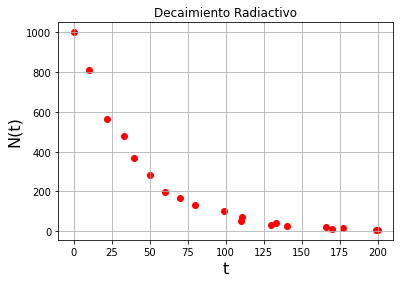

In [91]:
plt.scatter(X,Y, color='red')
plt.title('Decaimiento Radiactivo')
plt.xlabel('t', fontsize = 16)
plt.ylabel('N(t)', fontsize = 16)
plt.grid()

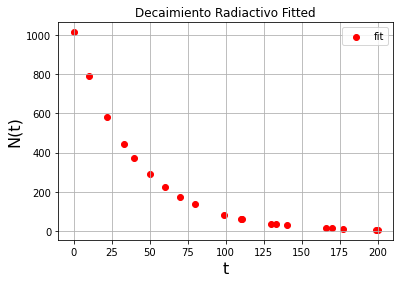

In [92]:
plt.scatter(X, func(X, *optimizedParameters), label="fit", color='red')

plt.title('Decaimiento Radiactivo Fitted')
plt.xlabel('t', fontsize = 16)
plt.ylabel('N(t)', fontsize = 16)
plt.grid()
plt.legend()
plt.show()